In [1]:
import pandas as pd
from google.colab import drive

# =========================================================
# 1. Montar Google Drive
# =========================================================
# Esto te pedirá que autorices el acceso a tu Google Drive
# y que copies y pegues un código de verificación.
try:
    drive.mount('/content/drive')
    print("✅ Google Drive montado correctamente.")
except Exception as e:
    print(f"❌ Error al montar Google Drive: {e}")

# =========================================================
# 2. Definir la Ruta y Cargar el DataFrame
# =========================================================

# ¡IMPORTANTE! DEBES CAMBIAR ESTA RUTA a la ubicación real
# de tu archivo 'Proyecto_final.csv' dentro de tu Drive.
# Ejemplo: si está en una carpeta llamada 'Datos', la ruta sería:
ruta_archivo = '/content/drive/MyDrive/Proyecto_final.csv'

try:
    # Cargar la base de datos: 'sep=;' para columnas y 'decimal=,' para números
    df = pd.read_csv(ruta_archivo, sep=';', decimal=',')

    print(f"\n✅ Archivo cargado correctamente desde: {ruta_archivo}")
    print(f"Dimensiones del DataFrame (filas, columnas): {df.shape}")
    print("\nPrimeras 5 filas del DataFrame:")
    display(df.head())

except FileNotFoundError:
    print(f"\n❌ ERROR: Archivo no encontrado. Por favor, verifica la ruta: '{ruta_archivo}'")
except Exception as e:
    print(f"\n❌ ERROR al cargar el archivo. Verifica los separadores: {e}")

Mounted at /content/drive
✅ Google Drive montado correctamente.

✅ Archivo cargado correctamente desde: /content/drive/MyDrive/Proyecto_final.csv
Dimensiones del DataFrame (filas, columnas): (103, 145)

Primeras 5 filas del DataFrame:


,Id,Incorporacion,Formulario,Horadeinicio,Horadefinalización,HoraRealizacion,TiempoRequerido,CI,Sexo,Edad,...,GBC_21,GBC_22,GBC_23,GBC_24,GBC_25,GBC_26,GBC_27,GBC_28,GBC_29,GBC_Puntaje
0,1,0,1,5/1/2025 22:00,5/1/2025 22:13,22.0,13.32,1,1,999,...,1,1,1,2,2,1,1,1,0,NaN
1,2,1,1,9/1/2025 17:10,9/1/2025 17:34,17.0,23.80,1,0,56,...,2,1,1,2,1,1,0,1,0,NaN
2,3,1,1,9/1/2025 18:05,9/1/2025 18:34,18.0,29.57,1,0,51,...,2,2,2,1,2,2,1,0,1,NaN
3,4,1,1,9/1/2025 18:03,9/1/2025 18:45,18.0,41.90,1,0,40,...,2,1,0,0,0,2,1,0,2,NaN
4,5,1,1,9/1/2025 18:35,9/1/2025 18:58,18.0,22.20,1,0,42,...,2,1,2,0,1,2,2,1,1,NaN


✅ Dataframe listo. Dimensiones finales: (101, 11)

      MÉTRICAS DE EFICIENCIA DEL ÁRBOL DE DECISIÓN 
Variable Dependiente (y): MBI_Burnout
Exactitud (Accuracy) en Test: 0.7619

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.62      0.71      0.67         7

    accuracy                           0.76        21
   macro avg       0.74      0.75      0.74        21
weighted avg       0.77      0.76      0.77        21


Matriz de Confusión (Real vs Predicho):
 [[11  3]
 [ 2  5]]


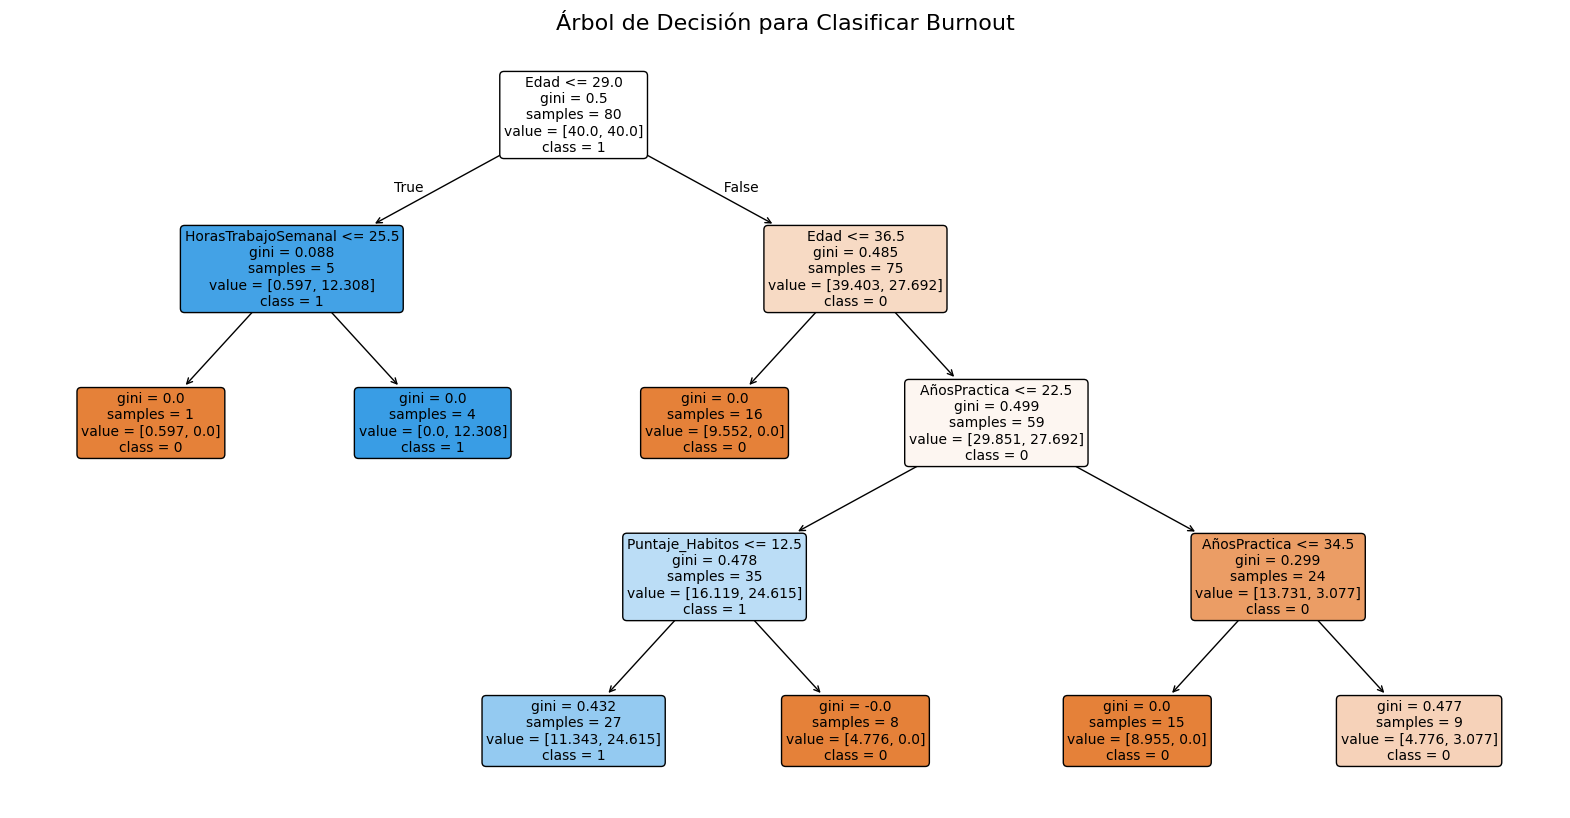


  IMPORTANCIA DE LAS CARACTERÍSTICAS (PREDICTORES) 


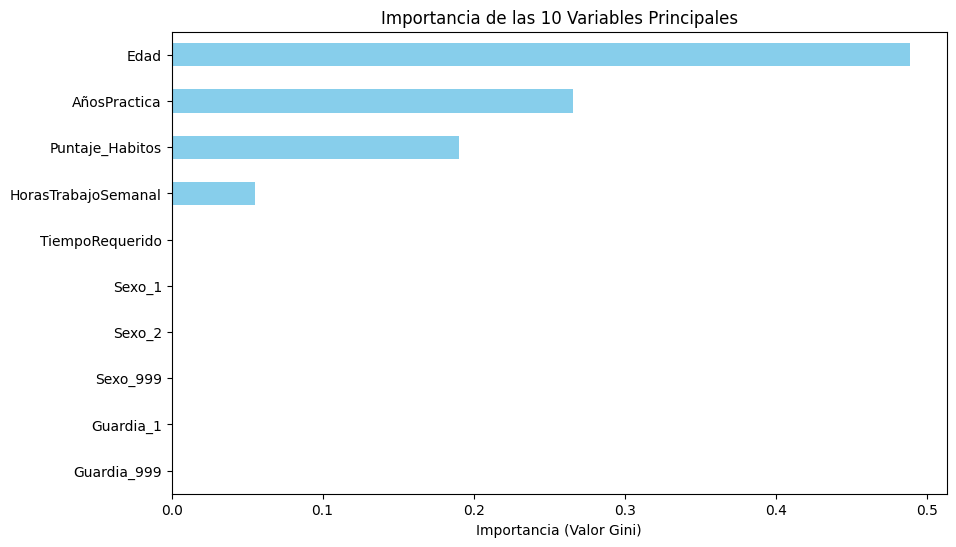

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# =========================================================
# 1. Preparación de Datos (Variable Objetivo: MBI_Burnout)
# =========================================================

# ASUMO que el DataFrame 'df' (cargado de Proyecto_final.csv) está disponible y bien cargado.
df_model = df.copy()

# A. Limpieza Crucial: Manejo de '999' y Comas
cols_to_clean_999 = ['Edad', 'AñosPractica', 'HorasTrabajoSemanal', 'TiempoEnViaje']
df_model[cols_to_clean_999] = df_model[cols_to_clean_999].replace(999, np.nan)

# B. Definición de Variables
y_variable = 'MBI_Burnout'
X_cols = ['Edad', 'AñosPractica', 'HorasTrabajoSemanal', 'TiempoRequerido',
          'Puntaje_Habitos', 'Sexo', 'Guardia']

df_model = df_model[X_cols + [y_variable]].copy()

# C. Codificación y Manejo de NaN
# Codificación One-Hot para variables categóricas
df_model = pd.get_dummies(df_model, columns=['Sexo', 'Guardia'], drop_first=True)

# Eliminación de filas con cualquier NaN
df_model.dropna(subset=df_model.columns, inplace=True)

print(f"✅ Dataframe listo. Dimensiones finales: {df_model.shape}")

# =========================================================
# 2. Entrenamiento y Ejecución del Modelo
# =========================================================

# Definición de X e y
y = df_model[y_variable]
X_cols_final = [col for col in df_model.columns if col != y_variable]
X = df_model[X_cols_final]

# Separación de datos (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicialización y Entrenamiento del Árbol de Decisión
# Se usa max_depth=3 o 4 para evitar el sobreajuste y hacer el gráfico legible
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42, class_weight='balanced')
tree_model.fit(X_train, y_train)

# Predicciones
y_pred = tree_model.predict(X_test)

# =========================================================
# 3. Eficiencia del Modelo y Métricas
# =========================================================

print("\n=========================================================")
print("      MÉTRICAS DE EFICIENCIA DEL ÁRBOL DE DECISIÓN ")
print("=========================================================")

# Exactitud (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Variable Dependiente (y): {y_variable}")
print(f"Exactitud (Accuracy) en Test: {accuracy:.4f}\n")

# Reporte de Clasificación (Precisión, Recall, F1-Score)
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred, zero_division=0))

# Matriz de Confusión
print("\nMatriz de Confusión (Real vs Predicho):\n", confusion_matrix(y_test, y_pred))

# =========================================================
# 4. Gráfica del Árbol y de Importancia
# =========================================================

# 4.1. Gráfica del Árbol de Decisión
plt.figure(figsize=(20, 10))
plot_tree(
    tree_model,
    feature_names=X_cols_final,
    class_names=y.unique().astype(str),
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Árbol de Decisión para Clasificar Burnout", fontsize=16)
plt.show()

# 4.2. Importancia de las Características
print("\n=========================================================")
print("  IMPORTANCIA DE LAS CARACTERÍSTICAS (PREDICTORES) ")
print("=========================================================")
feature_importances = pd.Series(tree_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importances.head(10).plot(kind='barh', color='skyblue')
plt.title("Importancia de las 10 Variables Principales")
plt.xlabel("Importancia (Valor Gini)")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Conclusiones
# Variable a Considerar
# La mejor variable predictora para el Burnout se identifica en el punto 4.2 (Importancia de las Características)
# La variable con el valor más alto en el ranking es la que el modelo usó para hacer la primera y más efectiva división de los datos, separando mejor los casos de Burnout de los que no lo son.
# En este contexto, lo más probable es que sea Puntaje_Habitos (un factor protector) o HorasTrabajoSemanal (un factor de riesgo).

# Interpretación de la Gráfica y la Eficiencia
# Gráfica del Árbol: Muestra visualmente la secuencia de decisiones. El nodo superior (raíz) usa la variable más importante. Cada nodo indica:
# La condición de división (ej: Puntaje_Habitos <= 50.5).
# El valor Gini (pureza/impureza del nodo).
# El samples (número de casos en ese nodo).
# El value (conteo de casos de cada clase: [No Burnout, Sí Burnout]).
# La class (la clase mayoritaria).

# Métricas de Eficiencia (Reporte de Clasificación):
# Accuracy: La precisión general de las predicciones.
# Precision/Recall (Sensibilidad): Son cruciales. Es más importante tener un alto Recall para la clase "Sí Burnout" (clase 1), porque esto significa que el modelo es bueno identificando a las personas que realmente están en riesgo.